# Python機械学習 勉強会 第三回「教師あり学習2」

参考文献：  
Pythonではじめる機械学習　2章  
https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

scikit-learnドキュメント：  
https://scikit-learn.org/stable/documentation.html

In [1]:
%matplotlib inline
from preamble import *
from sklearn.model_selection import train_test_split

<br>

---

## はじめに

今回は以下の内容を取り組む

* 教師あり機械学習アルゴリズム
    * 線形モデル
        * クラス分類のための線形モデル
        * 線形モデルによる多クラス分類
    * ナイーブベイズクラス分類器
    * 決定木
    * 決定木のアンサンブル法

<br>

---

## 2.3 教師あり機械学習アルゴリズム
### 2.3.1 線形モデル
#### 2.3.3.5 クラス分類のための線形モデル

線形モデルは回帰だけではなくクラス分類にも用いられている。  
ここでは、2クラス分類を学んでいく。

2クラス分類は次の式で予測する。

$$
\hat{y} = w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b > 0
$$

w, b: モデルのパラメータ  
x: 特徴量  
$\hat{y}$: 予測  


線形回帰と似ているが、特徴量の重み付き和を単に返すのではなく、  
値が0を超えるかどうかで分割している。

線形モデルによるクラス分類は、**決定境界**が入力の線形関数になる。  
これは、2つのクラスを直線や平面、超平面(高次元の場合)で分割する、ということ。

具体的にアルゴリズムをみていく。  
一般的な線形クラス分類アルゴリズムとして、以下2つが挙げられる。  
* ロジスティック回帰(logistic regression)
* 線形サポートベクタマシン(linear support vector machine: SVM)

それぞれのアルゴリズムを、forgeデータセットに適用して、決定境界を可視化してみる。

C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


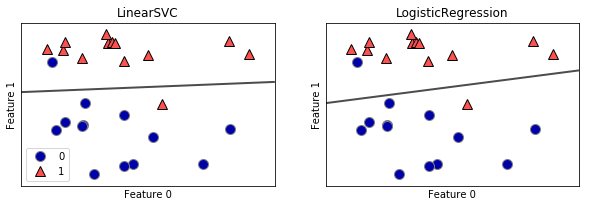

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

上の図は、x軸に特徴量1、y軸に特徴量2を取り、それぞれのアルゴリズムで見つけた決定境界を直線で表示している。
直線より上はクラス1、下はクラス0と判定している。

デフォルトではこれらのモデルは、L2正則化を行っている。
両アルゴリズムにおける正則化の強度を決定するパラメータは**C**であり、  
Cが大きくなると正則化が弱くなる。

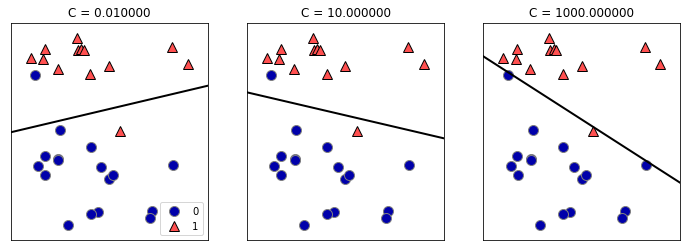

In [3]:
mglearn.plots.plot_linear_svc_regularization()

左は正則化が強く(ペナルティ大きくて学習不足)、右は正則化が弱い(過学習)。  
この例では、左も右もクラス全体としてのレイアウトを捉えられてなく、失敗している。

次にLogisticRegressionをcancerデータセットを用いて詳しく見ていく。

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score\t: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score\t\t: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score	: 0.955
Test set score		: 0.958


C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


デフォルトの正則化パラメータC=1.0では、訓練スコアとテストスコアが近い。  
これは学習不足(=正則化が強く単純なモデルになっている)の可能性が高いので、Cを変えてより柔軟なモデルにしてみる。

ここでは、正則化を弱めるためにパラメータ**C**を大きくする。

In [5]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score\t: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score\t\t: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score	: 0.972
Test set score		: 0.965


C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


デフォルトパラメータの結果と比較し、訓練スコアもテストスコアも向上した。  
つまり、デフォルトだと学習不足(=モデルが単純すぎる)であり、より複雑なモデルの方が精度が上がるという考えが裏付けられた。

念のため、逆に正則化を強くする(Cを小さくする)モデルを確かめてみる。

In [6]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score\t: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score\t\t: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score	: 0.934
Test set score		: 0.930


C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


予想通り、デフォルトよりも訓練スコア・テストスコア共に悪化した。

最後に、3つの正則化パラメータCに対して、学習された係数を見てみる。

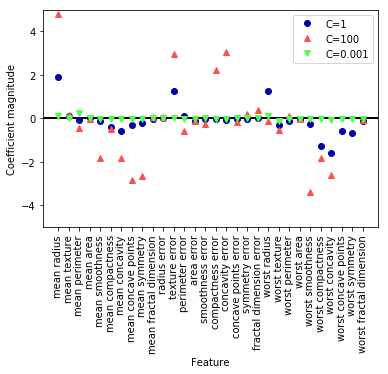

In [7]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

<br>

より解釈しやすいモデルが欲しいなら、L1正則化を使うと良い。  
L1正則化はわずかな特徴量をしか使わないように制限する。

L1正則化を行うには、オプション**penalty**に**l1**を指定する。

Training accuracy of l1 logreg with C=0.001	: 0.91
Test accuracy of l1 logreg with C=0.001		: 0.92

Training accuracy of l1 logreg with C=1.000	: 0.96
Test accuracy of l1 logreg with C=1.000		: 0.96

Training accuracy of l1 logreg with C=100.000	: 0.99
Test accuracy of l1 logreg with C=100.000		: 0.98



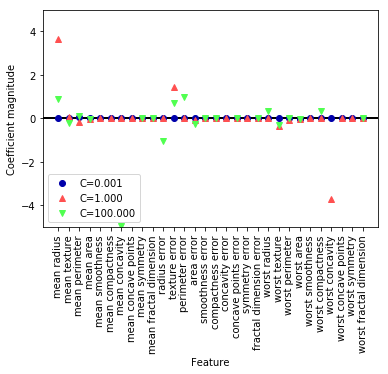

In [8]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    
    print("Training accuracy of l1 logreg with C={:.3f}\t: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}\t\t: {:.2f}\n".format(
          C, lr_l1.score(X_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

<br>

#### 2.3.3.6 線形モデルによる多クラス分類

多くの線形クラス分類モデルは、2クラス分類にしか適用できない(ロジスティック回帰は例外)。  
そこで、2クラス分類アルゴリズムを多クラス分類に拡張する一般的な手法として**1対その他)one-vs.-rest)アプローチ**がある。

各クラスに対して、そのクラスとその他すべてを含んだクラスの2クラス分類モデルを、多数使って予測する手法。  
予測時は、同じテストデータに対して、すべての2クラス分類器で予測実行し、一番高いスコアのクラスが予測結果となる。

ここでは、3クラス分類データセットに対して、1対その他手法を適用してみる。

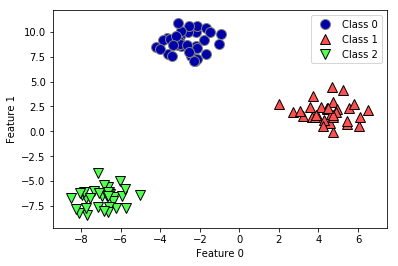

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [10]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape\t: ", linear_svm.coef_.shape)
print("Intercept shape\t\t: ", linear_svm.intercept_.shape)

Coefficient shape	:  (3, 2)
Intercept shape		:  (3,)


<br>

**coef_** には各クラス対応する係数ベクトル(線形モデル予測式の**w**)が格納されており、  
各行(3行)が各クラスに対応し、各列が特徴量(今回は2つ)に対応している。

どうように、**intercept_** には切片(線形モデル予測式の**b**)が格納されている。

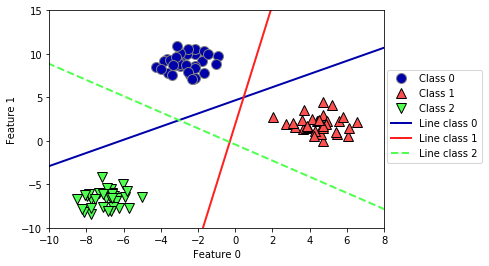

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

クラス0(青●)に着目すると、以下のことが分かる。
* クラス0vs.その他クラス分類器について、クラス0に対応する線より上側なので、クラス0と分類
* クラス1vs.その他クラス分類器について、クラス1に対応する線より左側なので、その他と分類
* クラス2vs.その他クラス分類器について、クラス2に対応する線より上側なので、その他と分類

つまり、クラス0群のデータセットは、クラス0と分類される。  

なお、中央の三角部分については、その点に一番近い式を持つグラフに分類される。

Text(0, 0.5, 'Feature 1')

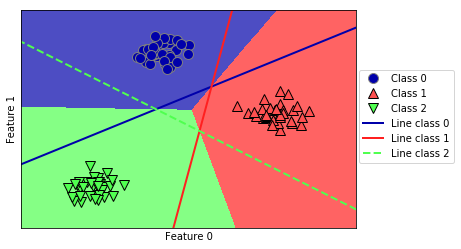

In [12]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<br>

#### 2.3.3.7 利点、欠点、パラメータ

線形モデルの主要なパラメータ
* 回帰モデル: alpha (大きいほど正則化強い)
* LinearSVC, LogisticRegression: C (小さいほど正則化強い)

線形モデルの利点の1つは、訓練も予測も高速であること。  
非常に大きいデータセットにも適用できるし、疎なデータに対してもうまく機能する。

もう1つの利点は、予測手法が比較的理解しやすいこと。  
回帰や分類は、前記の式によって行われている。

ただし、学習の結果、係数がどうしてその値になっているかは明らかではない。

また、線形モデルは特徴量の数がサンプルの個数よりも多いときに性能を発揮する。  
低次元空間(特徴量が少ない)では、他のモデルの方が良い汎化性能を示すこともある。

<br>

---

### 2.3.4 ナイーブベイズクラス分類器

実例も無いので基本的な特徴のみ。

ナイーブベイズクラス分類器は、線形モデルによく似たクラス分類器の1つ。  
訓練に必要な時間が線形モデルよりもさらに高速であり、高次元の疎なデータに対してもうまく機能する。

欠点としては、汎化性能がLogisticRegressionやLinearSVCより劣る場合が多い。

線形モデルですら時間がかかりすぎるような、大規模なデータセットに対するベースラインモデルとして有用。

<br>

---

### 2.3.5 決定木

決定木は、Yes/Noで答えられる質問で構成された階層的な木構造を学習する。

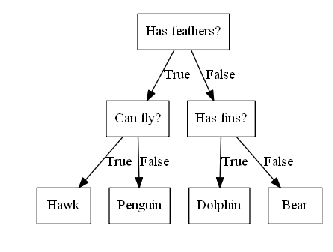

In [13]:
mglearn.plots.plot_animal_tree()

木のノードは、質問を表すか、答えを表す終端ノード(**葉**)か分かれる。

このモデルを機械学習の用語で表すと、  
4つのクラス(Hawk, Penguin, Dolphin, Bear)を3つの特徴量(Has feathers?, Can fly?, Has fins?)で識別するモデル。

これらの木構造を、データから教師あり学習によって作ることができる。

<br>

#### 2.3.5.1 決定木の構築

決定木の構築仮定を確認するために、下の図のようなデータセットを用いる。  
* 2クラスデータであり、それぞれ50データ

<br>

決定木における学習とは、正解に最も早くたどり着けるような一連のYes/No型の質問(**テスト**と呼ぶ)を見つけることである。  
連続値の場合は「特徴量iは値aよりも大きいか？」といった質問となる。

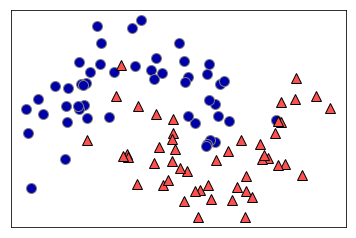

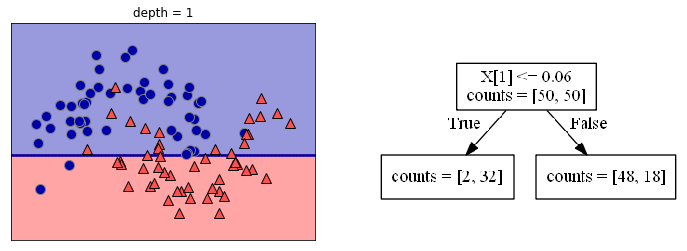

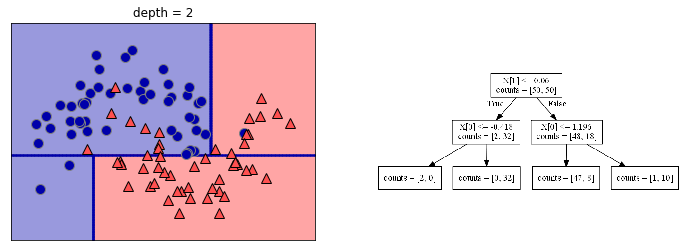

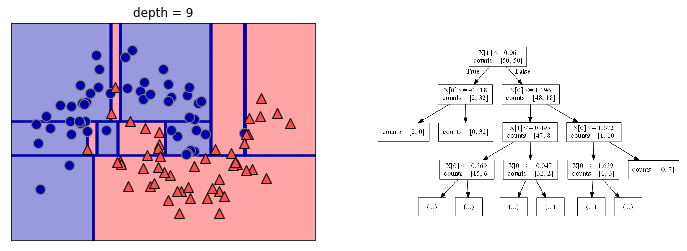

In [14]:
mglearn.plots.plot_tree_progressive()

決定木を構築する際、アルゴリズムはすべての可能なテスト(質問)の中から、  
目的変数に対して最も情報量の多いものを選ぶ。

上の例では、x[1]=0.06で水平にデータセットを分割することが、  
クラス0とクラス1を最もよく分割する(最も情報量が多い)と学習している。

<br>

このプロセスを再帰的に繰り返すことで、二分木による決定木が得られる。

データの再帰分割は、対象の領域に1つの対象値(1クラス)しか含まれなくなるまで繰り返される。
* 1つの対象値しか含まない決定木の葉を**純粋(pure)**と呼ぶ

<br>

新しいデータに対する予測は、決定木を上から順にテストして辿った先の  
その領域に含まれるデータポイントの多数が持つターゲット値が用いられる。

<br>

#### 2.3.5.2 決定木の複雑さの制御

葉が純粋になるまで分割を続けると、一般的にモデルが複雑になり、  
訓練データに対して過学習してしまう。

上の図のdepth=9では、完全に過学習している。

<br>

過学習を避けるには2つの戦略がある。
* 構築過程で木の生成を早めに止める**事前枝刈り(pre-pruning)**
* 一度木を構築してから、情報の少ないノードを削除する**事後枝刈り(post-pruning)**

<br>

事前枝刈りを実現する方法として大きく3つの方法がある。
* 木の深さ(depth)を制限
* 葉の最大値を制限
* 分割の際にその中に含まれている点の最小値を決める

### TIPS
sciki-learnには事前枝刈りしか実装されていない

<br>

事前枝刈りについて、cancerデータセットを用いて確認する。

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# cancerデータセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# デフォルト設定で決定木を構築(葉が純粋になるまで木を育てる)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set\t: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set	: 1.000
Accuracy on test set		: 0.937


<br>

想定通り、訓練セットの精度は100%となった。  
これは、葉が純粋になるまで木を生成したから。

テストセットの精度は約94%であり、線形モデルより少し悪くなっている。  
これは、過学習を起こしており、汎化性能が低くなっているから。

<br>
そこで、事前枝刈りを適用し、葉が純粋になる前に木の生成を止めてみる。  

1つの方法は、木がある程度の深さに達したら、生成を止めるという方法である。  
ここでは、max_depth=4として制限してみる。

In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set\t: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set	: 0.988
Accuracy on test set		: 0.951


<br>

狙い通り、訓練セットに対する精度は下がったが、  
テストセットに対する精度は上がっており、汎化性能が向上した。

<br>

#### 2.3.5.3 決定木の解析

export_graphviz関数、graphviz関数を使うと木を可視化できる。  

* export_graphviz関数は、グラフを格納するテキストファイルである「.dot」形式でファイルに書き出す。  
* graphviz関数は、dotファイルを読み込んで可視化する

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

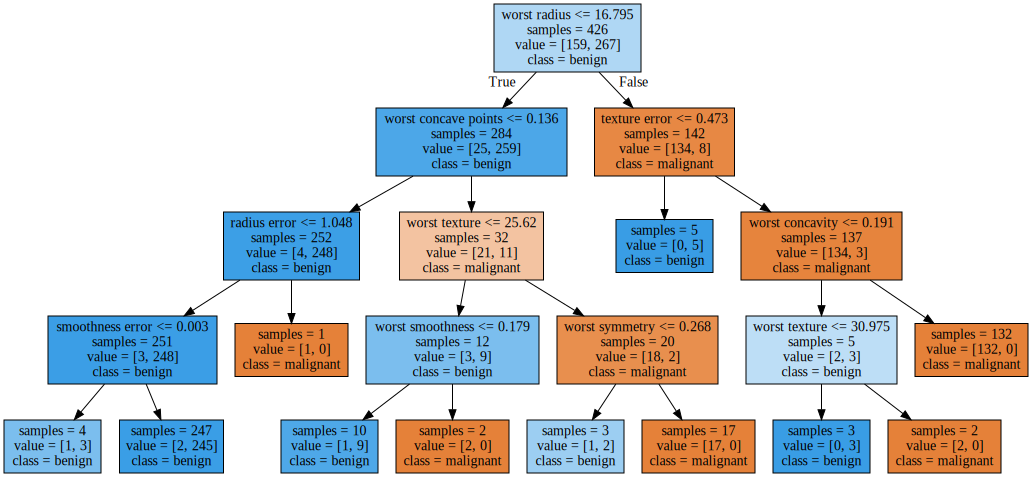

In [18]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

<br>

決定木を可視化すると、専門家以外にも予測過程を説明しやすい。  

ただし、木が深くなるほど決定木全体を見るのは大変なので、  
ここで決定木の挙動を要約する特性値を見る方法を確認する。

<br>

#### 2.3.5.4 決定木の特徴量の重要性

最もよく使われる方法は、**特徴量の重要度(feature importance)**と呼ばれる、  
個々の特徴量がどの程度重要かを示す割合である。

値は0(まったく使われていない)～1(完全にターゲットを予測できる)の間をとる。

In [19]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


In [20]:
print('訓練データの特徴量の数\t:', X_train.shape[1])
print('Feature importancesの数\t:', tree.feature_importances_.shape[0])

訓練データの特徴量の数	: 30
Feature importancesの数	: 30


<br>

### TIPS

scikit-learnの慣習として、学習済モデルの属性は、変数名の最後にアンダースコア「_」がつく

<br>

また、より分かりやすくするために、特徴量の重要度を可視化してみる。

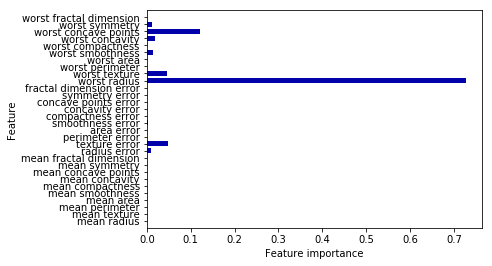

In [21]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    
    # 棒グラフ
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    # y軸の目盛設定
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    # 軸のタイトル
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    # y軸範囲の設定(見やすくするため)
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

<br>

図示するとどの特徴量が重要であるかわかりやすい。  

ただし、feature_importances_でわかるのは重要度であり、  
この値が大きいとどちらのクラスになるのか、までは分からない

<br>

ここまで説明したことは、決定木による回帰についてもほとんどあてはまる。  

ただし、1つ注意点があり、決定木による回帰モデル(DecisionTreeRegressor)は、
**外挿(extrapolate)**ができない。

つまり、訓練データのレンジの外側に対しては予測できない。

参考として、計算機のメモリ価格の履歴データセットで説明する。  
x軸は年、y軸はメガバイトあたりのRAM価格。

Text(0, 0.5, 'Price in $/Mbyte')

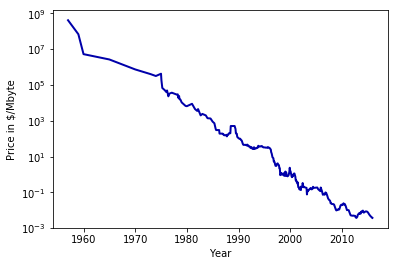

In [22]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

y軸は対数スケールで表示している。  

ここで、2000年までのデータを使って、以降の値を予測してみる。

ここではDecisionTreeRegressorとLinearRegressionを比較してみる。

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 過去のデータを用いて2000年以降うの価格を予測
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [24]:
# data_trainとdata_testは、pandasのDataFrame形式
print('data_train type: ', type(data_train))

data_train type:  <class 'pandas.core.frame.DataFrame'>


In [25]:
# pandasのDataFrameは。変数名.head()で先頭から5つのデータを表示
# ちなみに、変数.tail()で最後から5つのデータを表示
data_train.head()

,Unnamed: 0,date,price
0,0,1957.0,4.11e+08
1,1,1959.0,6.79e+07
2,2,1960.0,5.24e+06
3,3,1965.0,2.64e+06
4,4,1970.0,7.34e+05


In [26]:
print('data_train shape\t:', data_train.shape)
print('data_test shape\t\t:', data_test.shape)

data_train shape	: (202, 3)
data_test shape		: (131, 3)


In [27]:
# 日付に基づいて価格を予測するため、日付だけ抽出
X_train = data_train.date[:, np.newaxis]

# なぜ↑で [:, np.newaxis]しているか？
# それは、scikit-learnのモデル入力には、Numpyのndarray形式である必要があるから
# ためしに、np.newaxisを抜いた変数も作ってみる
X_train_ex = data_train.date[:]

In [28]:
print('data_train shape\t:', data_train.shape)
print('X_train shape\t\t:', X_train.shape)
print('X_train_ex shape\t:', X_train_ex.shape)

data_train shape	: (202, 3)
X_train shape		: (202, 1)
X_train_ex shape	: (202,)


In [29]:
print('X_train type\t\t:', type(X_train))
print('X_train_ex type\t\t:', type(X_train_ex))

X_train type		: <class 'numpy.ndarray'>
X_train_ex type		: <class 'pandas.core.series.Series'>


np.nrewaxsisを用いた変数はnumpy.ndarray形式となっており、  
scikit-learnのモデルに入力できる形式となっている。

<br>

In [30]:
# データとターゲットの関係を単純(≒線形)にするために対数変換
y_train = np.log(data_train.price)

# 木の構築と線形モデル構築
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 可視化の都合ですべての価格を予想
# 本来はテストデータセットだけを予測すればいい
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

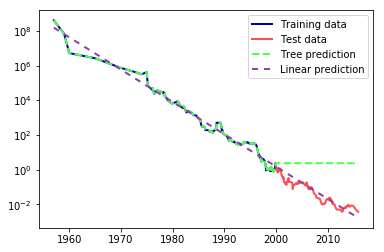

In [31]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

図の通り、決定木は訓練データに対しては完全な予測を行ったが、  
モデルがデータを持っていない領域になると、最後の点の値で予測してしまう。

### TIPS

決定木は、訓練データにない領域に関しては「新しい」答えを生成できない。  
これは、決定木に基づくすべてのアルゴリズムに共通する。

ただし、決定木を用いても将来を予測する方法はある。
* 例えば、価格が「上がる」か「下がる」かを予測するなど

決定木は時系列データを予測するのに適していない、ということではなく、  
予測方法の特性として覚えて欲しい。

<br>

#### 2.3.5.5 長所、短所、パラメータ

決定木を制御する**事前枝刈り**のパラメータとして、以下3つが挙げられる。
* max_depth        : 木の深さ
* max_leaf_nodes   : 木全体の中の葉の最大個数
* min_samples_leaf : 葉の中のデータポイントの最低個数

実用上は、どれか1つを指定するだけで十分。

<br>

決定木の長所として、以下2つが挙げられる。
* 結果が可視化可能で、予測の解釈が容易
* データのスケールに対して不変(正規化・標準化が不要)

<br>

決定木の短所としては、事前枝刈りを行ったとしても、  
過学習しやすく汎化性能が低い傾向にあること。

そのため、実用上は決定木を単体で使うのではなく、  
次に説明するアンサンブル法が用いられる。

<br>

---

### 2.3.6 決定木のアンサンブル法

アンサンブル法とは、複数の機械学習モデルを組み合わせて、  
より強力なモデルを構築する手法。

代表的な手法として、以下2つを説明する。
* ランダムフォレスト
* 勾配ブースティング決定木

<br>

#### 2.3.6.1 ランダムフォレスト

ランダムフォレストを簡潔に表現すると、  
**少しだけ異なる決定木をたくさん集めて平均するモデル**、と言える。

個々の決定木は過学習していても、多数の平均をとることで、  
予測性能を維持したまま過学習を解決している
* 厳密な数学で証明できるが、ここでは詳細は述べない

ランダムフォレストは、決定木を多数生成するが、  
その際に少しだけ異なるように構築仮定で乱数を用いている。
* そのため**ランダム**フォレストと呼ぶ

<br>

乱数を導入する方法として、以下2つが挙げられる。
* データポイントを選択
* 分岐テストに用いる特徴を選択

<br>

ランダムフォレストが実現したいのは、少しだけ異なる多数の決定木を集めること。  
そのために、以下のような方法でモデルを構築する。

1. 構築する決定木の数を決める

1. データから**ブーストラップサンプリング(boostrap sample)を行う  
データセットから、重複ありで同じ数だけを抽出する方法。  
これによって、元のデータセットと同じサイズだが、データの一部(約1/3)が欠け、  
また別の一部が重複しているデータが、複数(決定木の数だけ)作られる

1. 各決定木の学習の際に、使う特徴量の数もランダムに制限する

<br>

これらの方法によって、少しずつ異なるデータセット×異なる特徴量サブセット  
の組み合わせで多数の決定木が作られる。

実際に予測を行う際は、まず全ての決定木に対して予測を行い、  
結果の平均値を最終的な予測結果として出力する。

例として、two_moonsデータセットに適用してみる。

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

# n_estimators : 決定木の数
# randome_state : 乱数シード
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [33]:
type(forest)

sklearn.ensemble.forest.RandomForestClassifier

In [34]:
# 各決定木は、estimators_属性に格納されている
forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

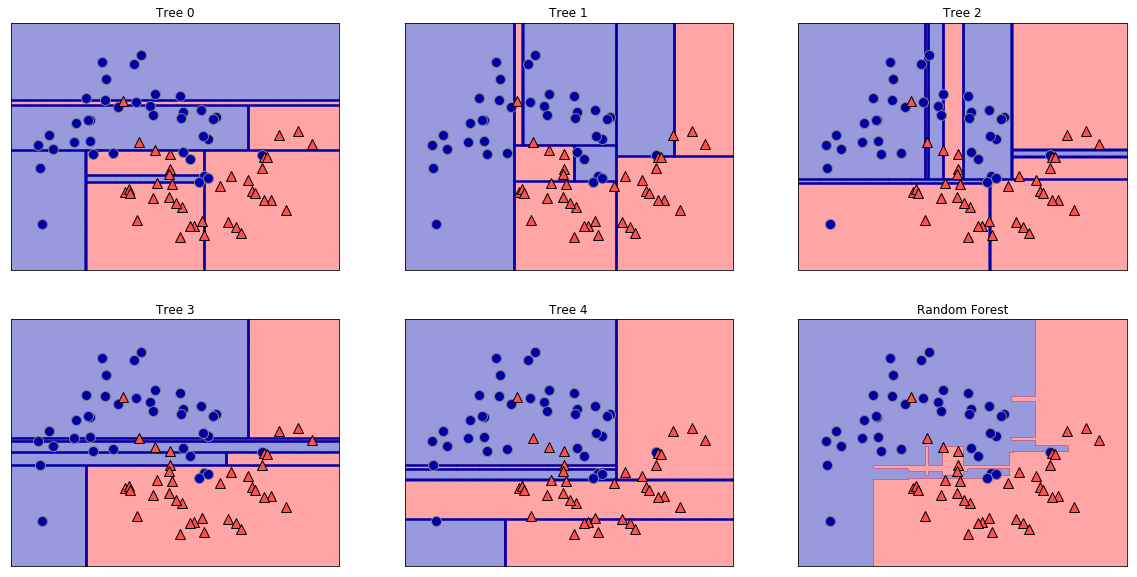

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

個々の決定木(Tree　0～4)は、明らかにそれぞれ異なっている。  
そして、ランダムフォレストはどの決定木よりも過学習の程度が低く、  
見た感じの直感に近い決定境界が作られている。

もう一つの例として、cancerデータセットに対して、100個の決定木を用いたランダムフォレストを試す。

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set\t: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set	: 1.000
Accuracy on test set		: 0.972


このランダムフォレストは、まったくパラメータを調整していないが、  
訓練セットに対する性能は線形モデルや決定木単体よりも高い。  

max_featuresパラメータや、個々の決定木に対して事前枝刈りを行うことで、  
さらにチューニングできるが、多くの場合はデフォルトのパラメータで十分機能する。

<br>

ランダムフォレストでも特徴量の重要度を確認できる。  
これは、個々の決定木の重要度を平均したものであり、個々の決定木のそれよりも信頼できる。

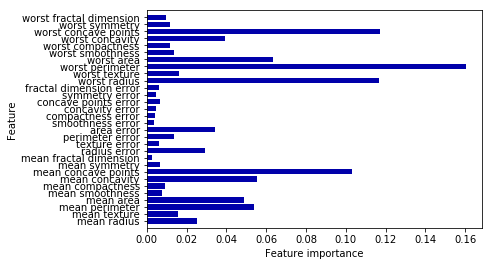

In [37]:
plot_feature_importances_cancer(forest)

ランダムフォレストでは個々の決定木よりも、多くの特徴量に対して重要度を付与している。  
これは、乱数性によって広い視野で見た全体像をとらえているから。

<br>

**長所、短所、パラメータ**

ランダムフォレストは、本質的に決定木の長所を残したまま欠点の一部を補っており、  
非常に強力のため幅広く使われている。
また、多くの場合はパラメータチューニングせずに使える。

非常に大きなデータセットに対しても機能するし、
計算コストは(決定木より)大きいが、複数のCPUコアを使って並列化することで対応できる。
* n_jobsパラメータ

<br>

欠点として挙げるならば、決定木ではモデルの解釈が容易だったのに対し、  
ランダムフォレストでは何十～何百の決定木を解釈するのは不可能となる。  

また、非常に高次元で疎なデータではく機能しない傾向があるため、  
その場合は別のアルゴリズムを検討したい。

<br>

パラメータとして、以下の事前枝刈りパラメータが挙げられる。
* n_estimators : 決定木の数
* max_features : 個々の決定木で用いる特徴量の数
* max_depth    : 木の深さ

**n_estimators**  
大きければ大きいほど性能は高い。  
ただし、メモリの量も訓練時間も長くなるので、それらが許容できる範囲で最大の値にする

<br>

#### 2.3.6.2 勾配ブースティング回帰木(勾配ブースティングマシン)

勾配ブースティングは、1つ前の決定木の誤りを、次の決定木が修正するようにして、  
決定木を順番に作っていく。

* デフォルトでは乱数性はなく、強力な事前枝刈りが行われる。

* 深さ1～5位の非常に浅い決定木(**弱学習機(weak learner)と呼ぶ**)を用いて、  
それらを多数組み合わせることで、性能を向上させる。

* 名前に回帰とあるが、回帰にもクラス分類にも利用できる。

<br>

勾配ブースティングは機械学習のコンペでもよく優勝しており、  
産業界でも幅広く使われている強力な手法。

パラメータの設定がシビアだが、適切に設定できればランダムフォレストよりも性能が良い。

ここで、cancerデータセットに対して適用してみる。

In [38]:

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set\t: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set	: 1.000
Accuracy on test set		: 0.958


デフォルトパラメータでは、訓練精度が100%でテスト精度が低いので、  
おそらく過学習している。

ここで、木の深さを制限して協力な事前枝刈りを実施してみる。

In [39]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set\t: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set	: 0.991
Accuracy on test set		: 0.972


狙い通り、訓練精度は下がったが、テスト精度が向上している。

<br>

過学習を避ける別の手段として、**学習率(learning rate)**を下げる方法がある。
* 学習率：個々の決定木が、それまでの決定木の過ちをどれくらい補正するかの指標  
　　　　値が大きいと、強く補正しようとしてモデルが複雑になる＝過学習しやすい

In [40]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set\t: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set	: 0.988
Accuracy on test set		: 0.965


狙い通りテスト精度が向上したが、  
この場合では、max_depthで制御した方が、汎化性能が高い結果になった。

<br>

他の決定木ベースの方法と同様に、特徴の重要度を確認できる。

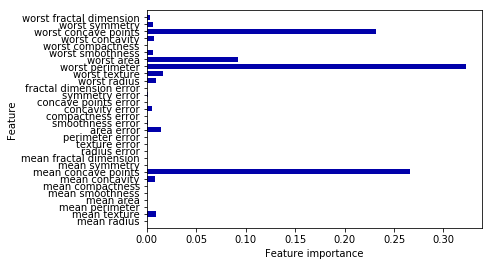

In [41]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

<br>

### TIPS

勾配ブースティングとランダムフォレストは同じようなデータを得意とする。  

まずはランダムフォレストで試してみるといい。  

ランダムフォレストでは予測時間がかかりすぎたり、  
ほんの少しでも性能を向上したい場合に勾配ブースティングを試すといい

<br>

### TIPS

勾配ブースティングの実装としては、大きく以下3つが挙げられる。
* scikit-learn
* xgboost
* light-gbm
* catboost

一般的には、scikit-learnの実装よりxgboost、xgboostよりはlight-gbmの方が、  
light-gbmよりはcatboostの方が高速で処理できる。

<br>

**長所、短所、パラメータ**

勾配ブースティング回帰木は、教師あり学習の中で最も強力で、広く使われている。  

他の決定木ベースのアルゴリズムと同様に、特徴量のスケール変換が不要で、  
2値特徴量と連続値特徴量が混在していてもうまく機能する。

<br>

欠点としては、訓練にかかる時間が長いことと、  
パラメータのチューニングに細心の注意がひつようであること。

<br>

主なパラメータは以下3つ。
* n_estimators : 決定木の数
* learning_rate : 学習率
* max_depth     : 木の深さ

ランダムフォレストではn_estimatorsは大きいほど性能が高かったが、  
勾配ブースティングでは過学習をまねきやすい。

一般的には、学習時間とメモリ量でn_estimatorsを決め、  
learning_rateを探索することで汎化性能を向上させる方法がとられる。

また、事前枝刈りとしてmax_depthを指定する際、  
通常では非常に小さく設定することが多く、深さが5以上になることはない。

<br>

---

## おわり

誤字脱字、不明点あればご連絡ください。